# CRAWL TWEET DATA BY #100DaysOfCode #

In [42]:
import tweepy,sys,jsonpickle
import xlrd
import xlwt
import pandas as pd
import re
from textblob import TextBlob


consumer_key = 'FsI8w28Im9Go6G8bhNGtypHJe'
consumer_secret = '6U8DqLwTKc67UeKBAv57xZu3y6l1GkdA1rk2A6KyzAZfNbF6WQ'
print("#===============================================#")
print("Crawling Hashtag Topic #100DaysOfCode")
print("\t Kelompok 1 Proudly Present")
print("#===============================================#")


qry = input("Masukkan Query yang akan anda cari :") #input query yang akan dicari
fName = input("Nama File Hasil Crawling :") #input nama file hasil pencarian
maxTweets = 20000# Isi sembarang nilai sesuai kebutuhan anda
tweetsPerQry = 100  # Jangan isi lebih dari 100, ndak boleh oleh Twitter

auth = tweepy.AppAuthHandler(consumer_key,consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

if (not api):
    sys.exit('Autentikasi gagal, mohon cek "Consumer Key" & "Consumer Secret" Twitter anda')

sinceId, max_id, tweetCount = None, -1, 0
hasilAnalisis=[]
print("Mulai mengunduh maksimum {0} tweets".format(maxTweets))
with open(fName,'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry, lang="en")
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,since_id=sinceId, lang="en")
            else:
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry,max_id=str(max_id - 1), lang="en")
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,max_id=str(max_id - 1),since_id=sinceId, lang="en")
            if not new_tweets:
                print('Tidak ada lagi Tweet ditemukan dengan Query="{0}"'.format(qry));break
            for tweet in new_tweets:
                tweet_properties = {}
                tweet_properties["tanggal_tweet"] = tweet.created_at
                tweet_properties["pengguna"] = tweet.user.screen_name
                tweet_properties["isi_tweet"] = tweet.text
                tweet_bersih = ' '.join(re.sub("((@[\w]*)|^RT[\s]+)|(r\$\w*)|(#[\w]*)|(',')|([0-9]+)|([0-9]+)"," ",tweet.text).split())
                tweet_bersih = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet.text)
                tweet_bersih = re.sub(r',','',tweet.text)
                tweet_bersih = re.sub(r':','',tweet.text)
                analysis = TextBlob(tweet_bersih)
                
                if analysis.sentiment.polarity > 0.0:
                    tweet_properties["sentimen"] = "positif"
                elif analysis.sentiment.polarity == 0.0:
                    tweet_properties["sentimen"] = "netral"
                else: 
                    tweet_properties["sentimen"] = "negatif"
                
                if tweet.retweet_count > 0:
                    if tweet_properties not in hasilAnalisis:
                        hasilAnalisis.append(tweet_properties)
                    else:
                        hasilAnalisis.append(tweet_properties)
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            tweetCount+=len(new_tweets)
            sys.stdout.write("\r");sys.stdout.write("Jumlah Tweets telah tersimpan: %.0f" %tweetCount);sys.stdout.flush()
            max_id=new_tweets[-1].id
        except tweepy.TweepError as e:
            print("some error : " + str(e));break # Aya error, keluar
print ('\nSelesai! {0} tweets tersimpan di "{1}"'.format(tweetCount,fName))

#===============================================#
Crawling Hashtag Topic #100DaysOfCode
	 Kelompok 1 Proudly Present
#===============================================#


Masukkan Query yang akan anda cari : #100DaysOfCode
Nama File Hasil Crawling : 100DaysOfCode.json


Mulai mengunduh maksimum 20000 tweets
Jumlah Tweets telah tersimpan: 20091
Selesai! 20091 tweets tersimpan di "100DaysOfCode.json"


# ANALISIS SENTIMEN #100DaysOfCode #

In [2]:
tweet_positif = [t for t in hasilAnalisis if t["sentimen"]=="positif"]
tweet_negatif = [t for t in hasilAnalisis if t["sentimen"]=="negatif"]
tweet_netral = [t for t in hasilAnalisis if t["sentimen"]=="netral"]

In [3]:
print("Hasil Sentimen")
print("positif: ", len(tweet_positif), "({} %)".format(100*len(tweet_positif)/len(hasilAnalisis)))
print("netral: ", len(tweet_netral), "({} %)".format(100*len(tweet_netral)/len(hasilAnalisis)))
print("negatif: ", len(tweet_negatif), "({} %)".format(100*len(tweet_negatif)/len(hasilAnalisis)))

Hasil Sentimen
positif:  3399 (33.82089552238806 %)
netral:  3864 (38.44776119402985 %)
negatif:  2787 (27.73134328358209 %)


# VISUALISASI ANALISIS SENTIMEN #100DaysOfCode #

Gambaran Umum Tweet Dengan #Ngabuburit


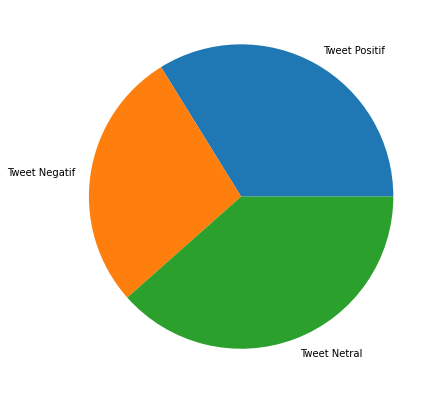

In [145]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

print('Gambaran Umum Tweet Dengan #Ngabuburit')

# Creating dataset
tren = ['Tweet Positif', 'Tweet Negatif', 'Tweet Netral']
  
data = [len(tweet_positif), len(tweet_negatif), len(tweet_netral)]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = tren)
  
# show plot
plt.show()

# Analisis Banyak Tweet Dengan #100DaysofCode Pada Waktu Tertentu #

In [78]:
xl=pd.read_json('100DaysOfCode.json', lines=True)
df =pd.DataFrame(xl)

In [87]:
df['created_at'].value_counts().head(10)

2021-04-24 02:11:21+00:00    46
2021-04-24 02:13:21+00:00    42
2021-04-24 02:12:21+00:00    38
2021-04-24 05:11:30+00:00    38
2021-04-24 02:14:21+00:00    37
2021-04-24 05:23:14+00:00    36
2021-04-24 01:23:14+00:00    33
2021-04-24 08:06:32+00:00    31
2021-04-24 08:15:40+00:00    31
2021-04-24 02:19:21+00:00    30
Name: created_at, dtype: int64

<AxesSubplot:>

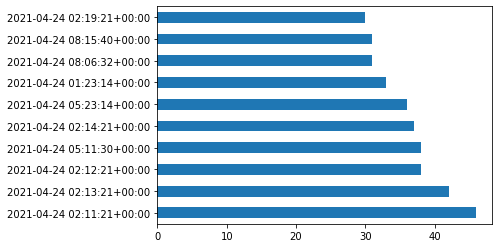

In [86]:
df['created_at'].value_counts().head(10).plot(kind='barh')

In [44]:
df.to_excel('100DaysOfCode.xlsx', encoding="utf-8")

In [45]:
data = pd.read_excel('100DaysOfCode.xlsx')
print ('Analisis Jumlah Tweet per Hari #100DaysoCode')
pd.value_counts(data.created_at)

Analisis Jumlah Tweet per Hari #100DaysoCode


2021-04-24    20091
Name: created_at, dtype: int64

# Analisis Banyak Kata Yang Sering Muncul pada #100DaysOfCode

In [149]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''

In [150]:
word = [None] * len(hasilAnalisis); 
for i in range(0, len(hasilAnalisis)):    
    word[i] = hasilAnalisis[i]['isi_tweet']
    word[i] = ' '.join(re.sub("((@[\w]*)|^RT[\s]+)|(r\$\w*)|(#[\w]*)|(',')|([0-9]+)|([0-9]+)"," ",word[i]).split())
    # remove hyperlinks
    word[i] = re.sub(r'https?:\/\/.*[\r\n]*', '', word[i])
    word[i] = re.sub(r',','',word[i])
    word[i] = re.sub(r':','',word[i])

In [151]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''


for val in word:
    val = str(val)
    
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
bannedWord = ['read','more','than', 'the', 'here', 'for','and','with','your','you','pay','help','are','day','can','new','amp','from','that','how']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(read|more|than|the|here|for|and|with|your|you|pay|help|are|day|can|new|amp|from|that|how)\\W", re.I)
    return pattern.sub("", toPrint)

comment_words = RemoveBannedWords(comment_words,bannedWord)

wordcloud = WordCloud(width = 800, height = 800,
                background_color = "white",
                min_font_size = 10).generate(comment_words)

# VISUALISASI PEMETAAN Banyak Kata Yang Sering Muncul pada #100DaysOfCode

<function matplotlib.pyplot.show(close=None, block=None)>

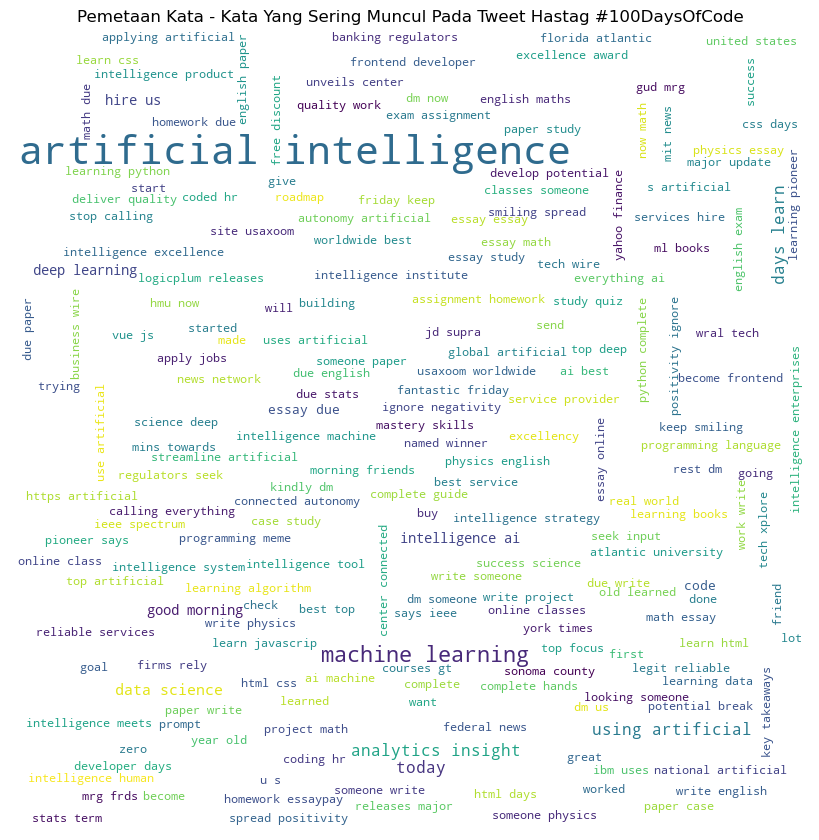

In [155]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Pemetaan Kata - Kata Yang Sering Muncul Pada Tweet Hastag #100DaysOfCode')
plt.show

# VISUALISASI TOP 10 Banyak Kata Yang Sering Muncul pada #100DaysOfCode

In [156]:
import re
import string

frequency = {} 
text_string = comment_words
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)

most_word = pd.DataFrame({'word': [], 'freq': []})

for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()

for words in frequency_list:
    most_word = most_word.append({'word': words, 'freq': frequency[words]}, ignore_index=True)

In [157]:
most_word.sort_values(by=['freq'], inplace=True, ascending = False)

In [158]:
comment_words = re.sub(r'','',comment_words)

In [159]:
most_word.head(10)

,word,freq
1,intelligence,6815.0
0,artificial,6770.0
47,learning,1306.0
10,learn,1023.0
80,machine,760.0
72,data,751.0
97,essay,687.0
79,science,657.0
459,news,647.0
351,today,632.0


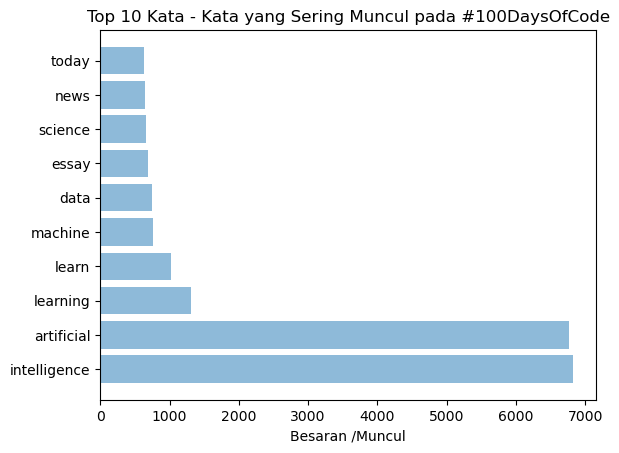

In [160]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = most_word['word'].head(10)
y_pos = np.arange(len(objects))
performance = most_word['freq'].head(10)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Besaran /Muncul')
plt.title('Top 10 Kata - Kata yang Sering Muncul pada #100DaysOfCode')

plt.show()
